In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('../data/raw/ai_jobs.csv')
print(df.head())

         job_id                  job_title  company_type    industry  \
0  0IFD0TVBDIVU             MLOps Engineer  Research Lab   Education   
1  ZMF8MDD4V30T               Data Analyst       Startup   Education   
2  CX1945NQ4FMY             MLOps Engineer  Research Lab        Tech   
3  QJ7YHL1C32OC          Applied Scientist  Research Lab  Healthcare   
4  F0T0PVN9ER14  Machine Learning Engineer  Research Lab     Finance   

     country    city remote_type experience_level  min_experience_years  \
0  Australia  Remote      Remote            Entry                     0   
1    Germany  Remote      Remote            Entry                     0   
2     Canada  Remote      Remote           Senior                     5   
3  Australia  Remote      Remote            Entry                     0   
4  Australia  Sydney      Hybrid              Mid                     2   

   salary_min_usd  salary_max_usd employment_type  posted_year company_size  
0           56873           72223     

In [7]:
##data understanding
print("Dataframe Shape:", df.shape)
print("Dataframe Info:")
print(df.info())
print("Missing Values in Each Column:")
print(df.isnull().sum())
print("Statistical Summary:")
print(df.describe())


Dataframe Shape: (50000, 14)
Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   job_id                50000 non-null  object
 1   job_title             50000 non-null  object
 2   company_type          50000 non-null  object
 3   industry              50000 non-null  object
 4   country               50000 non-null  object
 5   city                  50000 non-null  object
 6   remote_type           50000 non-null  object
 7   experience_level      50000 non-null  object
 8   min_experience_years  50000 non-null  int64 
 9   salary_min_usd        50000 non-null  int64 
 10  salary_max_usd        50000 non-null  int64 
 11  employment_type       50000 non-null  object
 12  posted_year           50000 non-null  int64 
 13  company_size          50000 non-null  object
dtypes: int64(4), object(10)
memory usage: 5.3

In [10]:
df['avg_salary']=(df['salary_max_usd']+df['salary_min_usd'])/2

In [11]:
df=df.drop(columns=['salary_min_usd','salary_max_usd','job_id','city',])

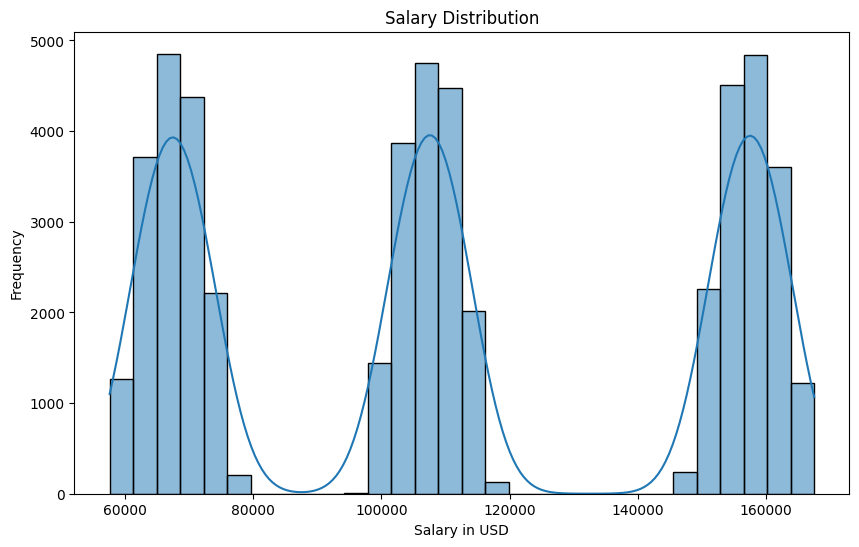

In [12]:
# visualizations
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_salary'].dropna(), bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

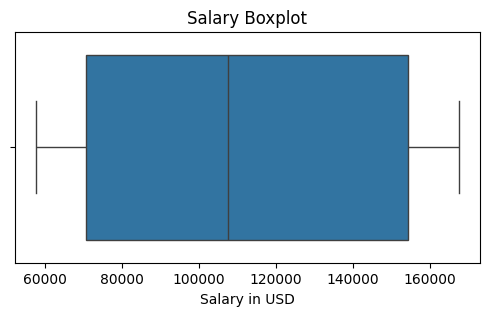

In [13]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['avg_salary'])
plt.title('Salary Boxplot')
plt.xlabel('Salary in USD')
plt.show()


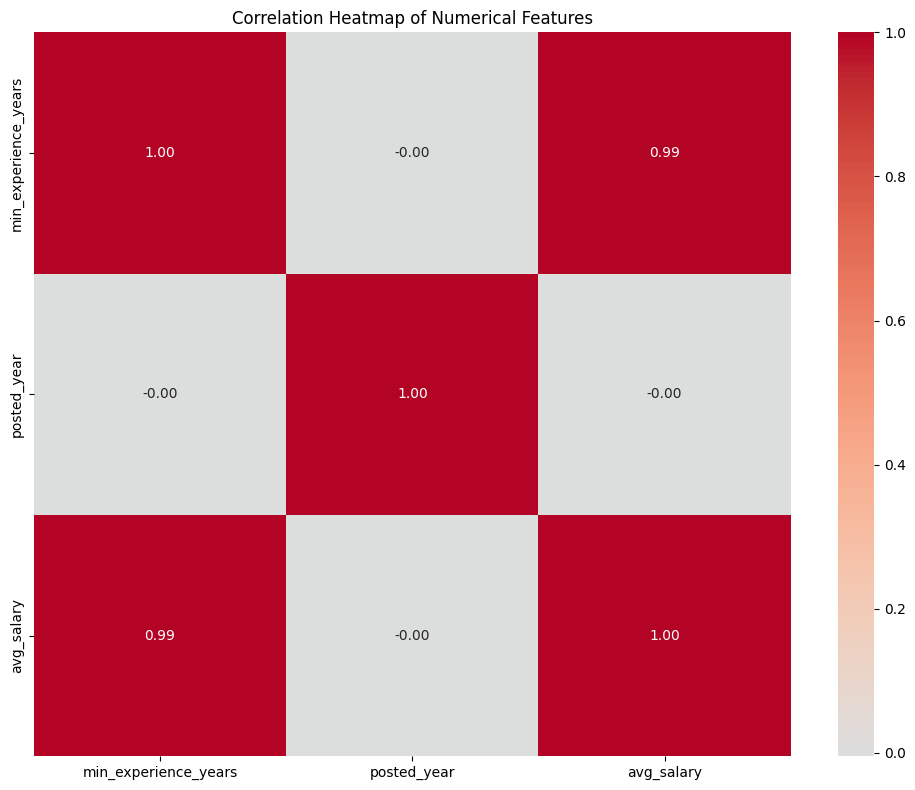

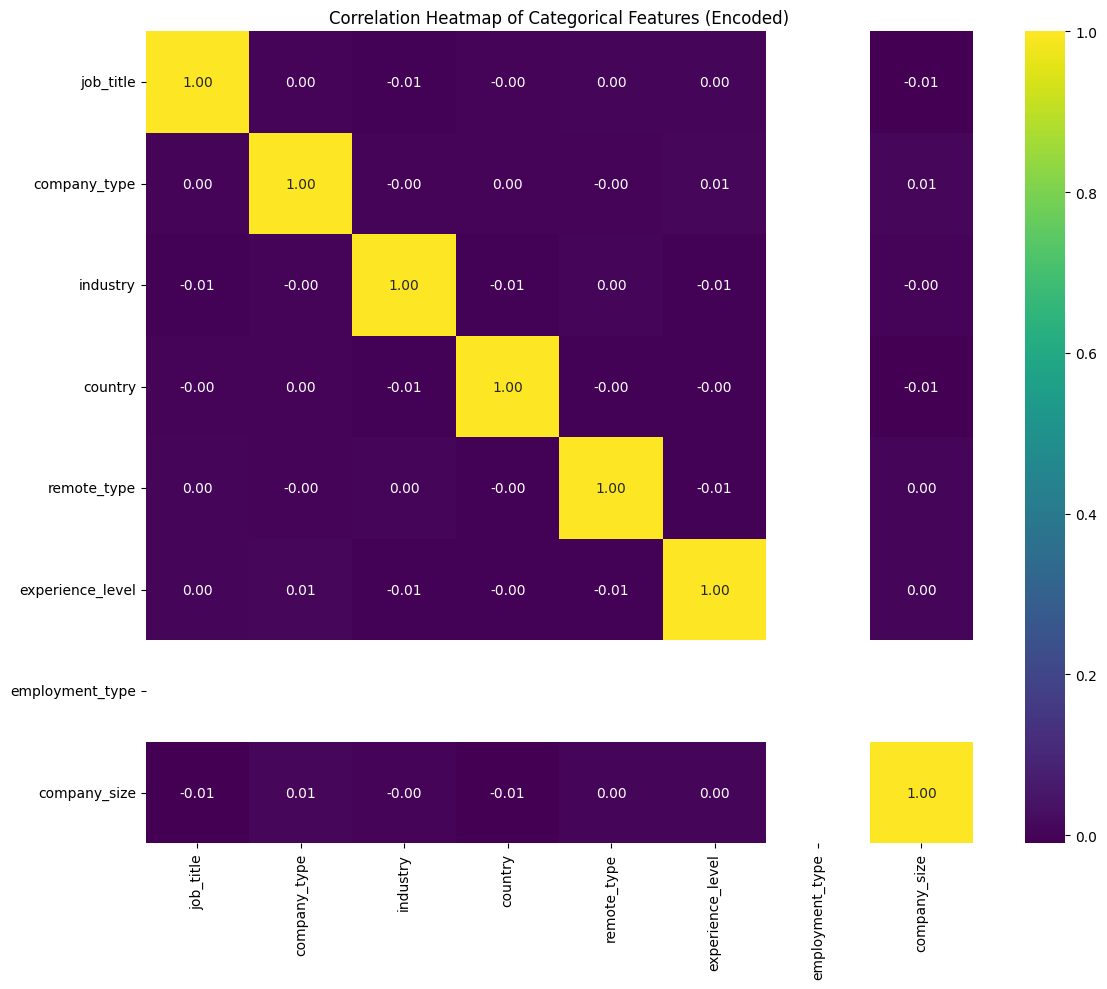

In [16]:
# Prepare numerical and categorical columns for heatmap
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# For categorical features, create a count plot or encode and visualize
# Encode categorical variables
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = pd.factorize(df[col])[0]

plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded[categorical_cols].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap of Categorical Features (Encoded)')
plt.tight_layout()
plt.show()